In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy import random

In [2]:
class arms:
    def __init__(me,delta,T):
        me.arm1=random.normal(loc=0, scale=1, size=T)
        me.arm2=random.normal(loc=delta, scale=1, size=T)
        
    def getarms(me):
        return [me.arm1,me.arm2]
    def getloss(me, it):
        return [me.arm1[it],me.arm2[it]]

In [3]:
class bandits:
    def __init__(me):
        me.mean1=0
        me.count1=0
        me.mean2=0
        me.count2=0
    
    def update(me,loss,arm):
        if arm==1:
            updt= me.mean1*me.count1-loss
            me.count1+=1
            me.mean1=updt/me.count1
        elif arm==2: 
            updt= me.mean1*me.count2-loss
            me.count2+=1
            me.mean2=updt/me.count2
        else:
            pass
            
    def fullupdate(me,lossvec):
        me.update(lossvec[0],1)
        me.update(lossvec[1],2)
        
    def returnarm(me):
        return me.mean1, me.mean2

In [4]:
def f(t):
    return 1+t*(np.log(t))**2

In [5]:
# print(f(np.e))

In [123]:
class newbandits:
    def __init__(me):
        me.mean1=0
        me.count1=0
        me.ucb1=0
        #___________________
        me.mean2=0
        me.count2=0
        me.ucb2=0
    
    def update(me,loss,arm,t):
        T=10000
        #update after t for t+1
        if arm==1:
            updt= me.mean1*me.count1-loss
            me.count1+=1
            me.mean1=updt/me.count1
            #___________________
            me.ucb1= me.mean1+np.sqrt(np.log(T/me.count1)/(me.count1))
        
        elif arm==2: 
            updt= me.mean1*me.count2-loss
            me.count2+=1
            me.mean2=updt/me.count2
            #___________________
            me.ucb2= me.mean2+np.sqrt(np.log(T/me.count2)/(me.count2))
        else:
            pass
            
    def fullupdate(me,lossvec,t):
        me.update(lossvec[0],1,t)
        me.update(lossvec[1],2,t)
    
    def getUCB(me):
        return [me.ucb1, me.ucb2]
        
    def returnarm(me):
        return me.mean1, me.mean2

In [7]:
arm=arms(0.1,1000)
# bandit=bandits()
a=np.sum(arm.getarms())
a

183.61744937285843

In [8]:
def optimalGETC(T,delta):
    answer=4/(delta**2)*math.log(T*delta**2/4)
    answer=math.ceil(answer)
    return answer

In [9]:
optimalGETC(1000,0.1) 

367

In [10]:
GETC(0.1)

NameError: name 'GETC' is not defined

In [ ]:
# arm=arms(0.1,1000)


In [13]:
def arand(T,arm):
    loss=0
    loss1=0
    loss2=0
    regretbound=[]
    for t in range(1,T+1):
        lossvec=arm.getloss(t-1)
        #____
        loss1-=lossvec[0]
        loss2-=lossvec[1]
        #_______%2+1
        i=t%2+1
        loss-=lossvec[i-1]
        regretbound.append(loss- np.amin([loss1,loss2]))
       
    return regretbound

In [101]:
def GETC0(delta,T=1000,arms=[0 for k in range(1000)]):
    loss=0
    loss1=0
    loss2=0
    regretbound=[]
#     ucb1=0
#     ucb2=0
    arm=arms
    known_bandits=newbandits()
    full_bandits=newbandits()
    chk=0
    for t in range(1,T+1):
        lossvec=arm.getloss(t-1)
        #____
        loss1+=lossvec[0]
        loss2+=lossvec[1]
        full_bandits.fullupdate(lossvec,t)
        #_______
        if t<=2:
            i=t
            loss+=lossvec[i-1]
            known_bandits.update(lossvec[i-1],i,t)
            regretbound.append(loss- np.amin([loss1,loss2]))
        else:#t>2
#             if t==3:
#                 print(known_bandits.getUCB())
            i=np.argmax(known_bandits.getUCB())+1
#             print(known_bandits.returnarm())
            #print(i)
            loss+=lossvec[i-1]
            known_bandits.update(lossvec[i-1],i,t)
            regretbound.append(loss- np.amin([loss1,loss2]))
#     print(i) 
#     print(known_bandits.returnarm())
#     print(known_bandits.getUCB())
#     print([known_bandits.count1,known_bandits.count2])
#     print([loss1,loss2,loss])
#     print(full_bandits.returnarm())
#     print(full_bandits.getUCB())
#     print([full_bandits.count1,full_bandits.count2])
#     regret=loss- np.amin([loss1,loss2])
#     print(regret)
#     print(regretbound)
    return regretbound
        
        
        
    

<ipython-input-123-bda97267bc92>:19: RuntimeWarning: invalid value encountered in sqrt
  me.ucb1= me.mean1+np.sqrt(np.log(1/me.count1)/(me.count1))
<ipython-input-123-bda97267bc92>:26: RuntimeWarning: invalid value encountered in sqrt
  me.ucb2= me.mean2+np.sqrt(np.log(1/me.count2)/(me.count2))


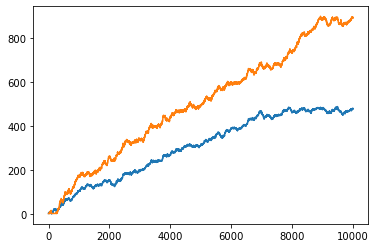

In [127]:
# maga=0
# for i in range(10000):
arm=arms(0.1,10000)
plt.plot(arand(10000,arm))
plt.plot(GETC0(0.1,10000,arm))

In [ ]:
full_bandits.count1

In [108]:
from tqdm import tqdm
medianu=[0 for i in range (10000)]
maxiu=[0 for i in range(10000)]
miniu=[0 for i in range(10000)]
medianr=[0 for i in range (10000)]
itera=100
for i in tqdm(range(itera)):
    arm=arms(0.5,10000)
    reg=GETC0(0.5,10000,arm)
    med=arand(10000,arm)
    for j in range(10000):
#         print(medianu,reg)
        medianu[j]+=reg[j]
        medianr[j]+=med[j]
        if reg[j]>maxiu[j]:
            maxiu[j]=reg[j]
        if reg[j]<miniu[j]:
            miniu=reg

for i in range(10000):
    medianu[i]=medianu[i]/itera
    medianr[i]=medianr[i]/itera
        

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:25<00:00,  1.18it/s]


plot(median)

Text(0, 0.5, 'Regret')

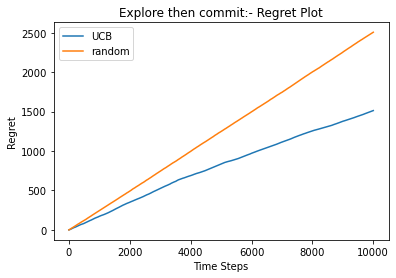

In [129]:
import matplotlib.pyplot as plt
plt.plot(medianu, label='UCB')
plt.plot(medianr, label='random')
plt.legend(loc='best')
plt.title("Explore then commit:- Regret Plot")
plt.xlabel('Time Steps')
plt.ylabel('Regret')

In [ ]:
medianu[9000]

In [ ]:
from tqdm import tqdm
median=[0 for i in range (1000)]
maxi=[0 for i in range(1000)]
mini=[0 for i in range(1000)]
itera=10000
for i in tqdm(range(itera)):
    arm=arms(0.1,1000)
    reg=GETC0(0.1,1000,arm)
    median+=reg
    if reg>maxi:
        maxi=reg
    elif reg<miniu:
        miniu=reg

medianu=medianu/itera
        

In [ ]:
medianu

In [ ]:
maxiu

In [ ]:
# def GETC(delta,T=1000):
#     loss=0
#     known_loss1=0
#     known_loss2=0
#     arm=arms(delta,T)
#     known_bandits=newbandits()
#     full_bandits=bandits()
#     m=optimalGETC(T,delta)
#     chk=0
#     for t in range(1,T+1):
#         lossvec=arm.getloss(t)
#         fullloss1-=lossvec[0]
#         loss2-=lossvec[1]
#         full_bandits.fullupdate(lossvec)
#         if t<=2:#m multiplied by number of arms
#             i=t
#             loss-=lossvec[i-1]
#             known_bandits.update(lossvec[i-1],i,t)
            
            
#         else:#t>mK
#             if chk==0:
#                 i=np.argmax(known_bandits.returnarm())+1
#                 chk=1
#                 print(known_bandits.returnarm())
#             #print(i)
#             loss-=lossvec[i-1]
#             known_bandits.update(lossvec[i-1],i)
#     print(i) 
#     print(known_bandits.returnarm())
#     print([loss1,loss2,loss])
#     print(full_bandits.returnarm())
#     regret=np.amax([loss1,loss2])-loss
#     return regret
            
        
        
        
    

In [ ]:
ban.update(2,1)

In [ ]:
ban.update(1,2)

In [ ]:
ban.returnarm()